
## Entropy

* Calculates entropy for greyscale values in img of girl
* The number of pixels with each greyscale are counted
* These frequencies are used to plot a histogram and calculate the entropy

Ref: JVStone Book




## Concepts

* Information is a well defined and measurable quantity.
* Shannon's information theory describes precisely how much information can be communicated between different elements of a system.
* it describes how signals and noise are related
* data = signal + noise




## The bit

* Information is usually measured in bits
* One bit of information allows you to select between 2 equally probable alternatives
* The bit gives 2 options (0 or 1). Selecting to walk left or right, eat or not, etc. represents 1 bit of information. It is all the information you have to decide which of the 2 options to select. That is one bit of information.
* Three binary digits provide you with 3 bits of information. And represent 8 equally probable alternatives.

$  \large   2^3 = 8      $

* One bit is the amount of information required to select between 2 equally probable alternatives.



## Numbers

* one hundred and one in decimal is 101

* (1 x 100) + (0 x 10) + 1 (1 x 1) = 101 (decimal)

and 

* five in binary is 101

* $ \large (1 x 2^2) + (0 x 2^1) + (1 x 2^0) = 5 $



## Logarithms

* $  \large   2^3 = 8      $


A more general way is:

* $  \large   2^n = m      $


or 

* $  \large    3  = log_2 8    $


similarly 

* $  \large    n  = log_2 m    $


In general, the logarithm of m is the power to which 2 must be raised in order to obtain m 

So, if you have to select between 8 equally probable alternatives, then you need 3 bits of information, like so:


* $  \large    3 = log_2 8    $

Concreteley,

## Logarithms Interpretation (Option 1) 

if you need to select between $ \large m $ equally probable alternatives, then you need $ \large n $ bits of information, like so: 

* $  \large    n  = log_2 m    $

## Logarithms interpretation (Option 2) 

if you have $ \large n $ bits of information, then you can select from  $ \large m $ equally probable alternatives, like so: 

* $  \large    m =  2^n    $



## Libraries


In [46]:

## !pip install matplotlib


In [47]:

from matplotlib import pyplot
from PIL import Image


from collections import Counter
import math



## More on Logarithms

* The function


In [48]:

def log2(posval):
 
    result = math.log(posval, 2)

    return result


In [49]:

m = 8

n = log2(m)

print(n)



3.0


In [50]:

m = 3

m = 2 ** n

print(  m  )


8.0


In [51]:

## values into log must be positive and not zero

x_data    = [i for i in range(1, 50)]

log2_data = [ log2(i) for i in x_data ]



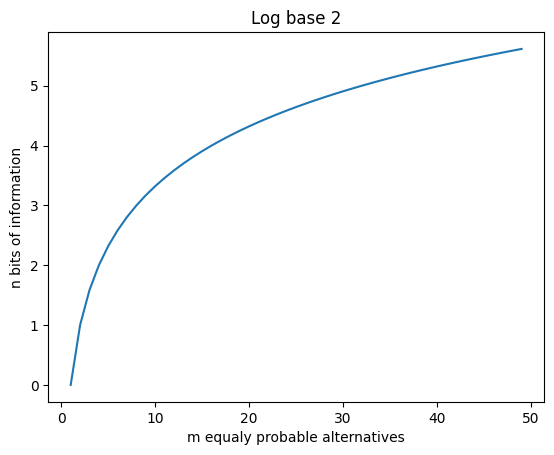

In [52]:

pyplot.plot(x_data , log2_data )

pyplot.title("Log base 2")
pyplot.xlabel("m equaly probable alternatives")
pyplot.ylabel("n bits of information")

pyplot.show()



## Utility Functions


In [53]:


def entropy_from_sample(distribution):
    """Arguments:
            distribution:  iterable, a sample distribution
        e.g     [1,2,5,2,2,1,4,4,2,2,2,2]
                ["A","B","C","B","B","A","D","D","B","B","B","B"]
                ["H","T","H","T",,"H","H","H","H","H"]
       returns:
            HX:  float, the entropy of the passed distribution"""

    # Use Counter to count the occurrence of each different value in the
    # distribution.  This returns a dict.  The values() method returns
    # all the values of the dict, which for the Counter object is a list
    # of frequencies.

    counterdict = Counter(distribution)

    frequencies = counterdict.values()

    #
    # Now we have a frequency distribution, we can find the entropy
    #
    HX = entropy_from_frequencies(frequencies)

    return HX


In [54]:

def diff_entropy_from_frequencies(distribution, binsize):
    """Arguments:
            distribution:  iterable, a frequency distribution
            binsize: the binsize
       returns:
            HX:  float, the differential entropy of the passed distribution
                with given binsize"""

    # Eq. 5.18 P 116
    HX = entropy_from_frequencies(distribution) - log2(1.0 / binsize)

    return HX


In [55]:

def row_totals(distribution):
    """Arguments:
            distribution:  a list of lists.  A 2D array.
       returns:
            totals:  list, the row totals of the passed distributizon"""

    # Make a list of the sum of each row for each row in the distribution.

    totals = [sum(row) for row in distribution]

    return totals


In [56]:

def col_totals(distribution):
    """Arguments:
            distribution:  a list of lists.  A 2D array.
       returns:
            totals:  list, the column totals of the passed distribution"""

    # Initialise the totals list
    totals = []

    # Loop for each column
    for col in range(len(distribution[0])):

        # Make a list of the values of column col of row
        # for each row in distribution."
        colvalues = [row[col] for row in distribution]

        # Store the sum of the column values
        totals.append(sum(colvalues))

    return totals


In [57]:

def flatten(distribution):
    """Arguments:
            distribution:  a list of lists.  A 2D array.
       returns:
            flatlist:  list, a 1D concatenation of the passed distribution"""

    flatlist = []                      # Initialise a flatlist
    for row in distribution:           # Loop for each row in the distribution
        for col in row:                # Loop for each column in the row
            flatlist.append(col)       # append the column value to flatlist

    return flatlist


In [58]:

def cumulative_gaussian(x, mu=0.0, sigma=1.0):
    """The cumulative Gaussian at x, for the distribution with mean mu and
    standard deviation sigma.
    Parameters
    ----------
    x : float or array
       The values of x over which to evaluate the cumulative Gaussian function
    mu : float
       The mean parameter. Determines the x value at which the y value is 0.5
    sigma : float
       The variance parameter. Determines the slope of the curve at
       the point of Deflection
    Returns
    -------
    Notes
    -----
    Based on:
    http://en.wikipedia.org/wiki/Normal_distribution
                                    #Cumulative_distribution_function"""

    t = x - mu
    y = 0.5 * erfcc(-t / (sigma * math.sqrt(2.0)))

    return min(y, 1.0)


In [59]:


def erfcc(x):
    """Complementary error function."""
    z = abs(x)
    t = 1.0 / (1.0 + 0.5 * z)
    r = t * math.exp(-z * z - 1.26551223 + t * (1.00002368 + t * (.37409196 +
        t * (0.09678418 + t * (-0.18628806 + t * (0.27886807 +
        t * (-1.13520398 + t * (1.48851587 + t * (-0.82215223 +
        t * 0.17087277)))))))))
    if x >= 0.0:
        return r
    else:
        return 2.0 - r



## Calculate Entropy


In [60]:

# Open the image

image = Image.open("girl.jpg")


In [61]:

image.size


(344, 299)

(-0.5, 343.5, 298.5, -0.5)

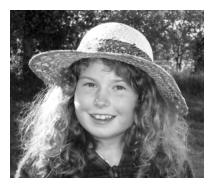

In [62]:

    
pyplot.figure("Girl")
pyplot.subplot(2, 2, 1)
pyplot.imshow(image, cmap='gray')
pyplot.axis('off')


In [63]:

# Load all pixels as an iterable list
pixels = image.getdata()


In [64]:

pixels


In [65]:

# Zero our frequency list

frequencies = [0] * 256

frequencies


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [66]:

len(frequencies)


256

In [67]:

# Loop over all pixels, incrementing the frequency for each greyscale
# value found

for pixel in pixels:
    frequencies[pixel] += 1


In [68]:

frequencies


[3,
 11,
 14,
 30,
 43,
 67,
 74,
 87,
 103,
 108,
 138,
 135,
 128,
 171,
 166,
 216,
 208,
 202,
 243,
 266,
 279,
 312,
 344,
 372,
 445,
 441,
 551,
 592,
 616,
 603,
 599,
 591,
 584,
 573,
 595,
 593,
 608,
 607,
 559,
 554,
 553,
 559,
 631,
 682,
 657,
 663,
 727,
 651,
 659,
 610,
 642,
 673,
 691,
 659,
 692,
 692,
 695,
 728,
 658,
 698,
 717,
 693,
 636,
 644,
 659,
 607,
 603,
 653,
 646,
 645,
 667,
 623,
 674,
 689,
 625,
 618,
 652,
 654,
 613,
 625,
 632,
 660,
 633,
 593,
 636,
 637,
 588,
 578,
 590,
 539,
 577,
 612,
 636,
 589,
 623,
 559,
 611,
 608,
 610,
 572,
 611,
 561,
 565,
 522,
 548,
 522,
 509,
 526,
 477,
 483,
 491,
 524,
 478,
 486,
 484,
 485,
 500,
 518,
 465,
 449,
 485,
 480,
 498,
 476,
 498,
 461,
 463,
 424,
 420,
 423,
 461,
 445,
 422,
 443,
 461,
 419,
 445,
 431,
 426,
 380,
 418,
 363,
 402,
 402,
 371,
 376,
 391,
 372,
 367,
 324,
 402,
 365,
 363,
 350,
 399,
 395,
 357,
 375,
 347,
 335,
 312,
 330,
 335,
 315,
 321,
 306,
 316,
 333,
 

In [69]:

##  Arguments: posval:  a postive number
## returns: result:  float, base 2 log of posval


def log2(posval):
 
    result = math.log(posval, 2)

    return result



In [70]:

##    Arguments: num:  the number to round
## decimal_p: integer, the number of decimal places
## returns:  result, string x rounded to p sig figs. 

def strrounddp(num, decimal_p):


    if num == "":
        result = "0." + "0" * decimal_p
    else:
        fmt = "%." + str(decimal_p) + "f"
        result = fmt % round(float(num), decimal_p)

    return result


In [71]:

## Arguments - > distribution:  a list of probabilities.
## returns: -> probabilities, list of valid probabilities. It removes zero values.
## All values should be positive.  The sum of the
## probabilities should be equal to 1.0 to 2 decimal places.

def valid_probabilities(distribution):
  

    # Check the probabilities sum to 1.00 to 2 decimal places
    
    if round(sum(distribution), 2) != 1.0:
        raise ValueError('Probabilities do not sum to 1')

    # Check we have no negative values
    if min(distribution) < 0:
        raise ValueError('Negative probability')

    # Make a list of the probabilities in distribution where
    # the probability is greater than zero
    probabilities = [p for p in distribution if p > 0]

    return probabilities


In [72]:

##   Arguments:
## probabilities:  iterable, a probability distribution
## returns:
## HX:  float, the entropy of the passed distribution"""


def entropy_from_probabilities(probabilities):
 

    # Check we have a valid list of probabilities
    probabilities = valid_probabilities(probabilities)

    # Set entropy count to zero
    HX = 0

    # Loop over all probabilities and sum the entropy from each (Eq 2.52 P37)
    for px in probabilities:
        HX = HX + px * log2(1.0/px)

    return HX


In [73]:

## Input -> frequencies:  iterable, a frequency distribution
## output =>         HX:  float,    the entropy of the passed distribution

def entropy_from_frequencies(frequencies):

    # Transform the frequencies to probabilities. The probability of
    # an event is its frequency divided by the sum of all frequencies.

    sum_of_frequencies = sum(frequencies)

    # Make a list of : the probabilty for each frequency in the
    # list of frequencies.

    probabilities = [freq / float(sum_of_frequencies) for freq in frequencies]

    #
    # Now we have a probability distribution, we can find the entropy
    #
    HX = entropy_from_probabilities(probabilities)

    return HX


In [74]:


# Use these frequencies to calculate an entropy

HX = entropy_from_frequencies( frequencies )



In [75]:

HX


7.837654799168986

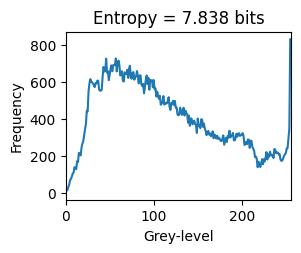

In [76]:


# plot all the points

pyplot.subplot(2, 2, 2)

# make vector of 256 grey-level values

x = range(256)

pyplot.plot(x, frequencies)

# Set title with entropy rounded to 3 sigfigs & label the axes

pyplot.title("Entropy = " + strrounddp(HX, 3) + " bits")
pyplot.xlabel("Grey-level")
pyplot.ylabel("Frequency")

# Truncate x axis at max value of greyscale
pyplot.xlim([0, len(frequencies)])

# Display the image & graph
pyplot.show()



## The convolved image

* reads the image and then calculates the convolved image 
* and plots the frequencies of the grey level differences between adjacent pixels 
* and calculates an entropy for this convolved image


In [77]:

# Open the image
image = Image.open("girl.jpg")


(-0.5, 343.5, 298.5, -0.5)

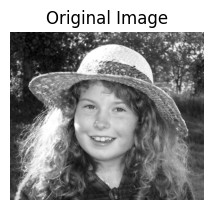

In [78]:




pyplot.figure("girl")

# Plot the original image
pyplot.subplot(2, 2, 1)
pyplot.title("Original Image")
pyplot.imshow(image, cmap='gray')
pyplot.axis('off')


In [79]:

# Get image size
xsize, ysize = image.size


In [80]:

xsize, ysize


(344, 299)

In [81]:




# Zero our frequency list
frequencies = [0] * 511




In [82]:
 
# Load pixels

pixels = image.load()


In [83]:

    
# Loop over all pixels, incrementing the frequency for each greyscale
# value found.
# As we loop we will make the convolved image by updating the pixel
# just visited with the greyscale difference
    
for row in range(0, ysize):
    for col in range(0, xsize - 1):
        diff = pixels[col + 1, row] - pixels[col, row]
        frequencies[diff+255] += 1
        # Change the pixel held to be the difference
        pixels[col, row] = diff + 127
    pixels[xsize - 1, row] = 0

 


(-0.5, 343.5, 298.5, -0.5)

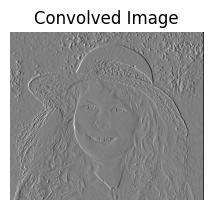

In [84]:

# Plot the convolved image

pyplot.subplot(2, 2, 2)
pyplot.title("Convolved Image")
pyplot.imshow(image, cmap='gray')
pyplot.axis('off')


In [85]:

# Use these frequencies to calculate an entropy

HX = entropy_from_frequencies(frequencies)


In [86]:

len(frequencies)


511

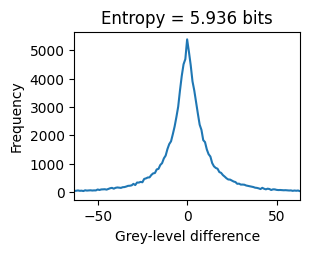

In [88]:

# Plot the grey level differences

pyplot.subplot(2, 2, 3)

# The greyscale differences can vary between -255 and 256.
# Create a list of these numbers : -255, -254, ..., 255, 256

diffs = range(-255, 256)

pyplot.plot(diffs, frequencies)

# Set title with rounded HX & axes labels

pyplot.title("Entropy = " + strrounddp(HX, 3) + " bits")
pyplot.xlabel("Grey-level difference")
pyplot.ylabel("Frequency")

# Truncate x axis at +/- 63

pyplot.xlim([-63, 63])

# Display the graphic

pyplot.show()



## Telegraphy Example

* Morse code (from JVStone book)

## FTC and Amazon Disclaimer 

This post/page/article includes Amazon Affiliate links to products. This site receives income if you purchase through these links. This income helps support content such as this one.



<a href="https://www.amazon.com/Information-Theory-Introduction-James-Stone/dp/0956372856?&linkCode=li2&tag=rcalix00-20&linkId=797f3ad06c7f8207207bd001733267d3&language=en_US&ref_=as_li_ss_il" target="_blank"><img border="0" src="//ws-na.amazon-adsystem.com/widgets/q?_encoding=UTF8&ASIN=0956372856&Format=_SL160_&ID=AsinImage&MarketPlace=US&ServiceVersion=20070822&WS=1&tag=rcalix00-20&language=en_US" ></a><img src="https://ir-na.amazon-adsystem.com/e/ir?t=rcalix00-20&language=en_US&l=li2&o=1&a=0956372856" width="1" height="1" border="0" alt="" style="border:none !important; margin:0px !important;" />


![morse](morse_code.jpg)
